## Versi 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import pairwise_distances

In [37]:
# Data
df_cleaned = pd.read_csv(r'tweets-data\cleaned.csv')

#slicing
df_cleaned = df_cleaned.iloc[:1001,:]
df_cleaned

,created_at,full_text,location,mentions,tokens,stemmed_tokens,clean_text
0,Tue Sep 17 23:55:49 +0000 2024,Yuk ganyang Fufufafa sesuai anjuran HRS PKS pa...,NaN,"['@UusRsd', '@msaid_didu']","['Yuk', 'ganyang', 'Fufufafa', 'sesuai', 'anju...","['yuk', 'ganyang', 'fufufafa', 'sesuai', 'anju...",yuk ganyang fufufafa sesuai anjur hrs pks bera...
1,Tue Sep 17 23:55:41 +0000 2024,Biasadrama mulyonopura kaget fufufafa fufufafaaaa,NaN,['@kompascom'],"['Biasadrama', 'mulyonopura', 'kaget', 'fufufa...","['biasadrama', 'mulyonopura', 'kaget', 'fufufa...",biasadrama mulyonopura kaget fufufafa fufufafaaaa
2,Tue Sep 17 23:55:11 +0000 2024,Jamet menjijikkan Mesum pula,"Jakarta Capital Region, Indone",['@fufu__fafa'],"['Jamet', 'menjijikkan', 'Mesum']","['jamet', 'jijik', 'mesum']",jamet jijik mesum
3,Tue Sep 17 23:55:00 +0000 2024,Nebeng temenato nebeng sopir temen Fufufafa fu...,NaN,['@satriohendri'],"['Nebeng', 'temenato', 'nebeng', 'sopir', 'tem...","['nebeng', 'temenato', 'nebeng', 'sopir', 'tem...",nebeng temenato nebeng sopir temen fufufafa fu...
4,Tue Sep 17 23:54:58 +0000 2024,kasian org ini model penakut Sama fufufafa yg ...,NaN,['@andikamalreza'],"['kasian', 'org', 'model', 'penakut', 'fufufaf...","['kasi', 'org', 'model', 'takut', 'fufufafa', ...",kasi org model takut fufufafa yg udah hina dia...
...,...,...,...,...,...,...,...
996,Tue Sep 17 11:19:02 +0000 2024,Fufufafa wkkk,NaN,"['@aewin86', '@BankSinarmas']","['Fufufafa', 'wkkk']","['fufufafa', 'wkkk']",fufufafa wkkk
997,Tue Sep 17 11:18:40 +0000 2024,Diem lu mending cebokin dulu sonoh si fufufafa,NaN,"['@Ayah3bidadari', '@AndiSinulingga']","['Diem', 'lu', 'mending', 'cebokin', 'sonoh', ...","['diem', 'lu', 'mending', 'cebokin', 'sonoh', ...",diem lu mending cebokin sonoh si fufufafa
998,Tue Sep 17 11:18:26 +0000 2024,Mungkin ada baiknya kita tunggu kapan menyanyi...,NaN,['@PKSejahtera_ID'],"['baiknya', 'tunggu', 'menyanyikan', 'lagu', '...","['baik', 'tunggu', 'nyanyi', 'lagu', 'ganyang'...",baik tunggu nyanyi lagu ganyang fufufafa dinya...
999,Tue Sep 17 11:18:10 +0000 2024,Mungkin ada baiknya kita tunggu kapan menyanyi...,NaN,"['@msaid_didu', '@PKSejahtera_ID']","['baiknya', 'tunggu', 'menyanyikan', 'lagu', '...","['baik', 'tunggu', 'nyanyi', 'lagu', 'ganyang'...",baik tunggu nyanyi lagu ganyang fufufafa dinya...


In [38]:
df_cleaned = df_cleaned.dropna(subset=['clean_text'])

# Menggunakan stopwords bahasa Indonesia dari `scikit-learn`
stopwords_id = ["yang", "dan", "di", "ke", "dari", "pada", "untuk", "dengan", "seperti", "adalah", "juga", "ini", "itu", "itu", "pada", "saat"]

# Inisialisasi CountVectorizer dengan stopwords bahasa Indonesia
vectorizer = CountVectorizer(stop_words=stopwords_id)
X = vectorizer.fit_transform(df_cleaned['clean_text'])

In [39]:
# Banyak dokumen (baris) dan fitur (kata unik) yang ada setelah proses BoW
print(X.shape)

(999, 3106)


In [40]:
# 10 kata pertama dalam vocabulary yang dihasilkan oleh CountVectorizer
print(vectorizer.get_feature_names_out()[:10])

['aaaah' 'aaah' 'aamiin' 'abad' 'abah' 'abahpaye' 'abai' 'abal' 'abang'
 'abis']


In [41]:
# Step 3: Apply LDA model using Scikit-learn's LatentDirichletAllocation
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(X)

# Step 4: Display the topics
# Get the words for each topic
words = vectorizer.get_feature_names_out()

for idx, topic in enumerate(lda_model.components_):
    print(f"Topic {idx}:")
    print([words[i] for i in topic.argsort()[-20:]])  # Top 10 words for each topic

Topic 0:
['pribadi', 'selasa', 'rakyat', 'tau', 'mulyono', 'orang', 'prabowo', 'puncak', 'gibran', 'berani', 'slot', 'gacor', 'anak', 'gak', 'ga', 'amp', 'akun', 'aja', 'yg', 'fufufafa']
Topic 1:
['tinggal', 'prabowo', 'abah', 'emang', 'aja', 'bela', 'gibran', 'ya', 'serang', 'yg', 'akun', 'satu', 'fafa', 'hrs', 'ganyang', 'fufu', 'nya', 'dukung', 'pks', 'fufufafa']
Topic 2:
['bahaya', 'ga', 'perintah', 'orang', 'presiden', 'jelek', 'tindak', 'lu', 'amp', 'hina', 'beliau', 'banget', 'nya', 'keluarga', 'si', 'akun', 'yg', 'prabowo', 'tdk', 'fufufafa']
Topic 3:
['sih', 'indonesia', 'kayak', 'org', 'keluarga', 'prabowo', 'hina', 'milik', 'biar', 'gak', 'nebeng', 'bahas', 'rakyat', 'aja', 'si', 'gibran', 'akun', 'ya', 'yg', 'fufufafa']
Topic 4:
['presiden', 'pasir', 'ga', 'serang', 'keluarga', 'solo', 'milik', 'pake', 'udah', 'orang', 'si', 'tp', 'aja', 'yg', 'akun', 'anak', 'nebeng', 'ya', 'mulyono', 'fufufafa']


In [42]:
# Step 5: Calculate Perplexity for LDA Model
# Perplexity measures how well the model predicts the data. Lower perplexity indicates better performance.
perplexity = lda_model.perplexity(X)
print(f"Model Perplexity: {perplexity}")

# Step 6: Calculate Coherence Score
# Coherence measures the interpretability of the topics by checking how frequently the top words of each topic appear together.

def coherence_score(lda_model, X, vectorizer, top_n=10):
    # Get topic-word distributions
    topic_word_matrix = lda_model.components_ / lda_model.components_.sum(axis=1)[:, np.newaxis]
    vocabulary = np.array(vectorizer.get_feature_names_out())

    # Compute pairwise distances between the top words of each topic
    coherence_scores = []
    for topic_idx, topic in enumerate(topic_word_matrix):
        top_words = vocabulary[np.argsort(topic)[-top_n:]]  # Get top_n words for each topic
        top_word_vectors = X[:, [vectorizer.vocabulary_[word] for word in top_words]].toarray()
        # Calculate pairwise cosine similarity
        topic_coherence = np.mean(pairwise_distances(top_word_vectors, metric="cosine"))
        coherence_scores.append(topic_coherence)

    return np.mean(coherence_scores)

coherence = coherence_score(lda_model, X, vectorizer)
print(f"Coherence Score: {coherence}")


Model Perplexity: 1756.481229150261
Coherence Score: 0.5165004007454721


## Versi 2

In [43]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import cohen_kappa_score
import numpy as np
import matplotlib.pyplot as plt

In [45]:
# Step 2: Membuat BoW menggunakan CountVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words=stopwords_id)
X = vectorizer.fit_transform(df_cleaned['clean_text'])

# Tampilkan Bag of Words
print("=== Bag of Words ===")
print(pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()).head())

=== Bag of Words ===
   aamiin  abah  abai  abang  abis  ad  adab  adeknya  adik  adil  ...  yaaa  \
0       0     0     0      0     0   0     0        0     0     0  ...     0   
1       0     0     0      0     0   0     0        0     0     0  ...     0   
2       0     0     0      0     0   0     0        0     0     0  ...     0   
3       0     0     0      0     0   0     0        0     0     0  ...     0   
4       0     0     0      0     0   0     0        0     0     0  ...     0   

   yah  yahudi  yes  yg  you  youtube  yuk  zonajajan  zonauang  
0    0       0    0   0    0        0    1          0         0  
1    0       0    0   0    0        0    0          0         0  
2    0       0    0   0    0        0    0          0         0  
3    0       0    0   0    0        0    0          0         0  
4    0       0    0   1    0        0    0          0         0  

[5 rows x 1173 columns]


In [46]:
# Step 3: Train LDA model with different components
perplexities = []
coherence_scores = []
n_topics_range = range(2, 11)  # Range of topics to evaluate

for n_topics in n_topics_range:
    lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda_model.fit(X)
    
    # Calculate perplexity
    perplexity = lda_model.perplexity(X)
    perplexities.append(perplexity)

    # Hitung coherence score menggunakan fungsi yang diberikan
    def coherence_score(lda_model, X, vectorizer, top_n=10):
        # Get topic-word distributions
        topic_word_matrix = lda_model.components_ / lda_model.components_.sum(axis=1)[:, np.newaxis]
        vocabulary = np.array(vectorizer.get_feature_names_out())

        # Compute pairwise distances between the top words of each topic
        coherence_scores = []
        for topic_idx, topic in enumerate(topic_word_matrix):
            top_words = vocabulary[np.argsort(topic)[-top_n:]]  # Get top_n words for each topic
            top_word_vectors = X[:, [vectorizer.vocabulary_[word] for word in top_words]].toarray()
            # Calculate pairwise cosine similarity
            topic_coherence = np.mean(pairwise_distances(top_word_vectors, metric="cosine"))
            coherence_scores.append(topic_coherence)

        return np.mean(coherence_scores)

    coherence_score_value = coherence_score(lda_model, X, vectorizer)
    coherence_scores.append(coherence_score_value)

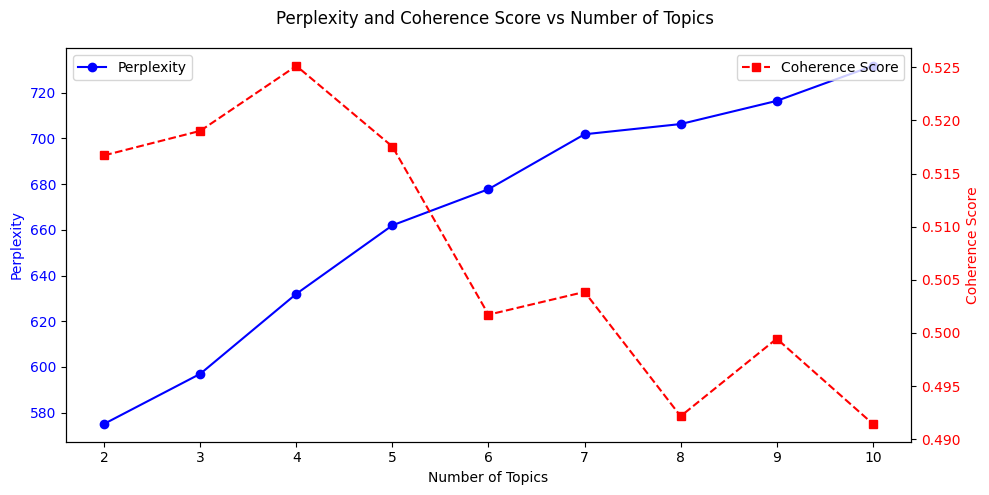

In [47]:
# Step 4: Visualize Perplexity and Coherence Score
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot Perplexity and Coherence Score
ax1.plot(n_topics_range, perplexities, marker='o', color='b', label='Perplexity')
ax1.set_xlabel('Number of Topics')
ax1.set_ylabel('Perplexity', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Plot Coherence Score
ax2 = ax1.twinx()
ax2.plot(n_topics_range, coherence_scores, marker='s', color='r', linestyle='--', label='Coherence Score')
ax2.set_ylabel('Coherence Score', color='r')
ax2.tick_params(axis='y', labelcolor='r')

fig.suptitle('Perplexity and Coherence Score vs Number of Topics')
fig.tight_layout()

# Tambahkan legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [48]:
# Step 6: Create a DataFrame for the results
results_df = pd.DataFrame({
    'Number of Topics': range(2,11),
    'Perplexity': perplexities,
    'Coherence Score': coherence_scores
})

# Display the table
print("\n=== Evaluation Results ===")
print(results_df)


=== Evaluation Results ===
   Number of Topics  Perplexity  Coherence Score
0                 2  575.079126         0.516709
1                 3  596.977165         0.519013
2                 4  631.988658         0.525124
3                 5  661.986494         0.517534
4                 6  677.811647         0.501722
5                 7  701.848481         0.503863
6                 8  706.323248         0.492173
7                 9  716.468731         0.499464
8                10  731.781993         0.491457


In [49]:
# Step 5: Display the topics from the final LDA model (with best n_components)
best_n_topics = 4  # Choose the best number based on the graphs
lda_model = LatentDirichletAllocation(n_components=best_n_topics, random_state=42)
lda_model.fit(X)

# Display the topics
words = vectorizer.get_feature_names_out()
print("\n=== LDA Topics ===")
for idx, topic in enumerate(lda_model.components_):
    print(f"Topic {idx + 1}:")
    print([words[i] for i in topic.argsort()[-10:]])  # Top 10 words for each topic


=== LDA Topics ===
Topic 1:
['banget', 'tau', 'yg', 'gibran', 'bahas', 'aja', 'nya', 'akun', 'ya', 'fufufafa']
Topic 2:
['milik', 'mulyono', 'orang', 'si', 'gak', 'gibran', 'aja', 'akun', 'yg', 'fufufafa']
Topic 3:
['keluarga', 'amp', 'akun', 'pks', 'si', 'hina', 'prabowo', 'tdk', 'yg', 'fufufafa']
Topic 4:
['gacor', 'puncak', 'wapres', 'gibran', 'ga', 'rakyat', 'amp', 'yg', 'nebeng', 'fufufafa']


Model Perplexity: Perplexity yang lebih rendah menunjukkan bahwa model lebih baik dalam memprediksi data.

Coherence Score: Semakin tinggi nilai koherensi (mendekati 1), semakin baik topik yang dihasilkan.